# Math 578 Lab 3
Noah Marshall

# Q1) 

First a preamble, where we import packages and define test functions. Then we'll implement Forward and Backward Euler methods for ODEs. 

In [60]:
# Preamble
import numpy as np
from numpy.linalg import norm
import scipy.linalg
import matplotlib.pyplot as plt

# Define our test models and their Jacobians (for BE)

def model1(t,y):
    y = y.copy()
    return y
def model1J(t,y):
    return np.eye(len(y))

def model2(t,y):
    y = y.copy()
    return -23*y
def model2J(t,y):
    return -23 * np.eye(len(y))

def model3(t,y):
    y= y.copy()
    y[0] = -1*y[0]
    y[1] = -100*y[1]
    return y
def model3J(t,y):
    return np.array([[-1, 0],[0,-100]])

def inv(A):
    # For whatever reason scipy wont return the recip. for 1x1 matricies
    if len(A) == 1:
        return 1/A
    else:
        return scipy.linalg.inv(A)

In [61]:
# Forward Euler
def odefe(f,h,t0,te,y0):
    '''
    f: function dependant on (tn,yn) assumed to be **vectorized**
    h: step size
    t0: start time
    te: end time
    y0: IC
        
    Returns: a dxn matrix where d is the function dimension and n is num. time steps
             a vector of times
    '''    
    n = int(np.floor((te - t0)/h)) # We expect the floor to be irrelevant in our experiments
    d = y0.size
    ysave = np.zeros((d,n))
    
    t = t0
    y = y0.copy()
    
    ysave = []
    tsave = []
    fevals = []    
    while t <= te:
        evals_iter = 0
        tsave.append(t)
        ysave.append(y)
        y = y + h * f(t,y.copy())
        evals_iter += 1
        t += h
        fevals.append(evals_iter)
    return tsave,ysave,fevals
    
# Backward Euler
def odebe(f,Jf,h,t0,te,y0):
    
    '''
    f: function dependant on (tn,yn) assumed to be **vectorized**
    h: step size
    t0: start time
    te: end time
    y0: IC
        
    Returns: a dxn matrix where d is the function dimension and n is num. time steps
             a vector of times
    '''    
    def nr(t,y,f,Jf,x0,tol=10**(-6)):
        evals = 0
        F = lambda x: (x - y - h*f(t,x))
        JF = lambda x: np.eye(len(y)) - h*Jf(t,x)

        n = 0
        xk = x0
        while n < 1000:
            xk1 = xk - np.matmul(inv(JF(xk)),F(xk))
            evals += 2
            if norm(xk - xk1) < tol:
                return xk1,evals        
            xk = xk1                        
            n += 1  
        
        
    n = int(np.ceil((te - t0)/h)) # We expect the floor to be irrelevant in our experiments
    d = y0.size
    
    t = t0
    y = y0.copy()
    
    ysave = []
    tsave = []
    fevals = []
    while t <= te:
        evals_iter = 0
        tsave.append(t)
        ysave.append(y)
        
        t += h
        x0 = y + h * f(t,y.copy())
        evals_iter += 1
        y,evals = nr(t,y,f,Jf,x0)
        evals_iter += evals
        
        fevals.append(evals_iter)


    return tsave, ysave,fevals

# Q1) 

With the methods implemented we can now compare them.

## a) 

Ok, with forward and backward Euler methods implemented we can now test them out. 

In [4]:
hs = np.linspace(0.0001,0.1,100)

yfe1 = np.zeros(len(hs))
ybe1 = np.ones(len(hs))
nfe1 = np.zeros(len(hs))
nbe1 = np.zeros(len(hs))

yfe2 = np.zeros(len(hs))
ybe2 = np.ones(len(hs))
nfe2 = np.zeros(len(hs))
nbe2 = np.zeros(len(hs))

yfe3 = np.zeros([2,len(hs)])
ybe3 = np.ones([2,len(hs)])
nfe3 = np.zeros(len(hs))
nbe3 = np.zeros(len(hs))

for i,h in enumerate(hs):
    f = model1
    Jf = model1J
    t0 = 0
    te = 2
    y0 = np.array([1,1])
    
    t,y,evals = odefe(f,h,t0,te,y0)
    yfe1[i] = y[-1][-1]
    nfe1[i] = sum(evals)    
    
    t,y,evals = odebe(f,Jf,h,t0,te,y0)
    ybe1[i] = y[-1][-1]
    nbe1[i] = sum(evals)       
    
for i,h in enumerate(hs):
    f = model2
    Jf = model2J
    t0 = 0
    te = 2
    y0 = np.array([1,1])
    
    t,y,evals = odefe(f,h,t0,te,y0)
    yfe2[i] = y[-1][-1]
    nfe2[i] = sum(evals)    
    
    t,y,evals = odebe(f,Jf,h,t0,te,y0)
    ybe2[i] = y[-1][-1]
    nbe2[i] = sum(evals)                   
    
for i,h in enumerate(hs):
    f = model3
    Jf = model3J
    t0 = 0
    te = 2
    y0 = np.array([1,1])
    
    t,y,evals = odefe(f,h,t0,te,y0)
    yfe3[:,i] = y[-1]
    nfe3[i] = sum(evals)    
    
    t,y,evals = odebe(f,Jf,h,t0,te,y0)
    ybe3[:,i] = y[-1]     
    nbe3[i] = sum(evals)        
    
    

I think it makes sense to explain the results one at a time as each case is somewhat different.

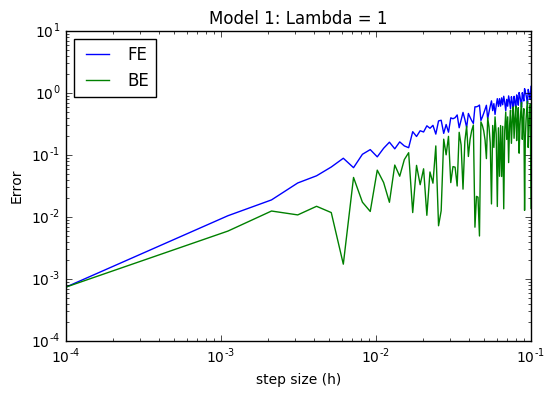

In [5]:
errorsfe1 = [norm(y - np.exp(2)) for y in yfe1]
errorsbe1 = [norm(y - np.exp(2)) for y in ybe1]
plt.loglog(hs,errorsfe1)
plt.loglog(hs,errorsbe1)
plt.legend(['FE','BE'],loc = 'upper left')
plt.xlabel('step size (h)')
plt.ylabel('Error')
plt.title('Model 1: Lambda = 1')
plt.show()

##### Model 1: Lambda = 1

First off, it should be noticed that I relabeled the models as compared to the asignment. Model 1 is the case where $\lambda = 1$. 

Here we see that Backwards Euler does better than Forwards Euler. However, the improvement is marginal and factoring in the extra difficultly to code, not really worth it. This isn't to suprising.

BE is expected to outperform FE when the ODE changes quickly. Here with $\dot{y} = y$, this system definitely does not change very quickly. 

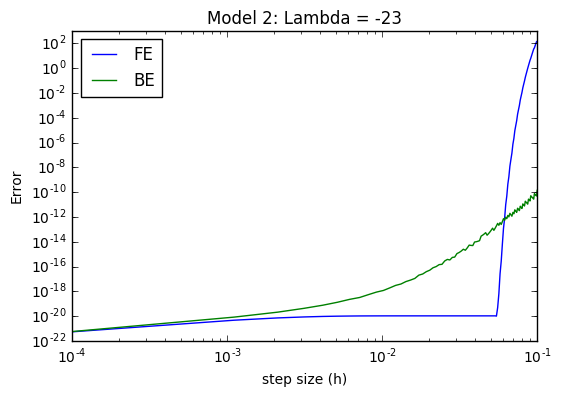

In [6]:

errorsfe2 = [norm(y - np.exp(1)**(-23*2)) for y in yfe2]
errorsbe2 = [norm(y - np.exp(1)**(-23*2)) for y in ybe2]
plt.loglog(hs,errorsfe2)
plt.loglog(hs,errorsbe2)
plt.legend(['FE','BE'],loc = 'upper left')
plt.xlabel('step size (h)')
plt.ylabel('Error')
plt.title('Model 2: Lambda = -23')
plt.show()
    

##### Model 2: Lambda = -23

This case is clearly different from Model 1. With relatively large step sizes, FE does very poorly. We expect it to find values close to $\exp(-66)$ while it is off finding values around 100. It is known that small errors accumulate while using FE while this problem is avoided using BE. 

Interestingly, FE does better than BE for the 'middle-sized' steps. It seems the BE makes slow and steady progress. Not too surprising again given an error of O(h) with good stability.

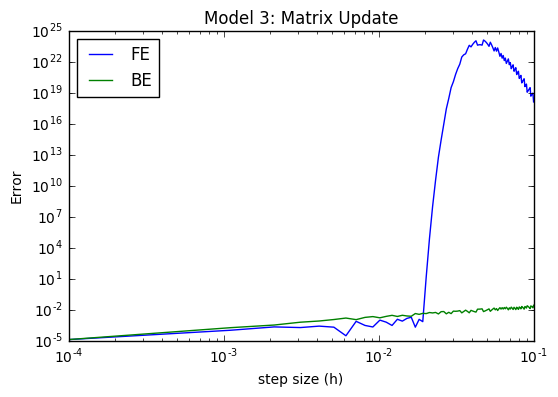

In [7]:

errorsfe3 = []
errorsbe3 = []
sol = np.array([np.exp(-2),np.exp(-200)])
for i in range(yfe2.shape[0]):
    errorsfe3.append(norm(yfe3[:,i] - sol))
    errorsbe3.append(norm(ybe3[:,i] - sol))                                                
plt.loglog(hs,errorsfe3)
plt.loglog(hs,errorsbe3)
plt.legend(['FE','BE'],loc = 'upper left')
plt.xlabel('step size (h)')
plt.ylabel('Error')
plt.title('Model 3: Matrix Update')
plt.show()

##### Model 3: Matrix update

This scenario clearly shows where FE fails. FE, for relatively large step sizes is catastrophically bad. Not too much different is happening from Model 2, expect that this scenario is turned up a notch. It should still be noted that FE found the $y_1$ value of the system without much trouble. 

That fact also is not surprising. The given system of ODEs were entirely independant of each other. We could just have well solved them separately. 

In [8]:
# Evidence that FE solved the y1 value well, despite failing horribly at y2
print("True y_1 value: " + str(np.exp(-2)))
print("True y_2 value: " + str(np.exp(-200)))
print("Forward Euler y_1 value " + str(yfe3[0,-1])) # with the largest step size
print("Forward Euler y_2 value " + str(yfe3[1,-1])) # with the largest step size

True y_1 value: 0.1353352832366127
True y_2 value: 1.3838965267367376e-87
Forward Euler y_1 value 0.1350851717672992
Forward Euler y_2 value -1.3508517176729928e+18


## b)


We've seen how well FE and BE solve a handful of test systems. Now let's look at the convergence vs the amount of function evaluations we have to make.


Fevals are interesting. More some problems (like our current toy problems) function calls cost almost nothing and shouldn't be a consideration. Other systems require seconds or longer per function call and should then be used sparingly.

We've already saved the number of function evaluations in our previous run so all we need to do now is plot it.

Also, I count an evaluation of the derivative used in the course of Newton's Method as a function evaluation. Presumably, if the function is expensive to evaluate then its derivative is expensive to evaluate in general.

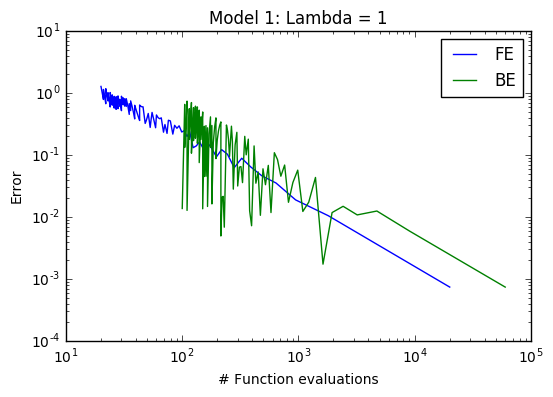

In [9]:
errorsfe1 = [norm(y - np.exp(2)) for y in yfe1]
errorsbe1 = [norm(y - np.exp(2)) for y in ybe1]
plt.loglog(nfe1,errorsfe1)
plt.loglog(nbe1,errorsbe1)
plt.legend(['FE','BE'],loc = 'upper right')
plt.xlabel('# Function evaluations')
plt.ylabel('Error')
plt.title('Model 1: Lambda = 1')
plt.show()

### Model 1: Lambda = 1

For these plots it is good to note that the better method will have points in the lower left quadrant of the curve of the worse function. (IE, one wants less or equal error for less evaluations) 

Also, it is good to note that points corresponding to a **higher** step size will be on the left side of the graphs. Finally, for visibility, I chose to plot taking the log of both the error and number of function evaluations. 

For this model, with high step size FE requires almost an order of magnitude less evals in order to achieve the accuracy obtained by BE. We also see that BE has the potential to outperform FE for middling step size values. However, this is not certain to be the case. 

And although the improvement is less dramatic than for high step sizes, with small step sizes FE achieves the same or better accuracy for less evals than BE.

Overall, it is pretty clear that FE is a better method than BE for this model.

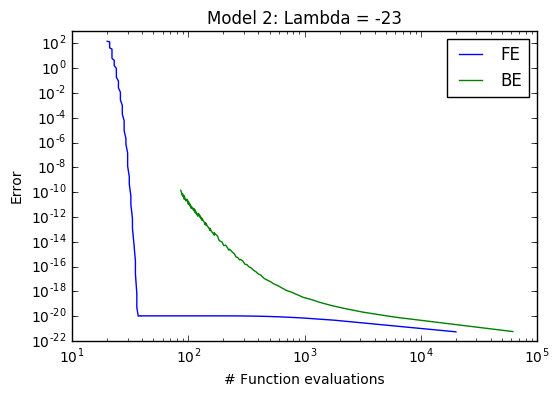

In [10]:
errorsfe2 = [norm(y - np.exp(1)**(-23*2)) for y in yfe2]
errorsbe2 = [norm(y - np.exp(1)**(-23*2)) for y in ybe2]
plt.loglog(nfe2,errorsfe2)
plt.loglog(nbe2,errorsbe2)
plt.legend(['FE','BE'],loc = 'upper right')
plt.xlabel('# Function evaluations')
plt.ylabel('Error')
plt.title('Model 2: Lambda = -23')
plt.show()    

#### Model 2: Lambda = -23


Again, we see that FE will perform very poorly for high step sizes. Yes it requires less evaluation to do so bad but that isn't really a consolation. 

However, once the step size is small enough FE is very obviously a better method than BE. For instance, FE achieves accuracy on the order of $10^{-20}$ with more than 2 orders of magnitude less function evaluations than BE. In terms of efficiency, FE is very clearly a better method than BE on this model. 

The caveat is that the chosen step size must be low enough. If for some odd reason, a large step size is absolutely required, BE may be the better choice.

With a very small step size, the methods perform roughly the same. However, given the added difficulty in implementing BE, along with the slight efficiency gain using FE, it is a nicer choice.

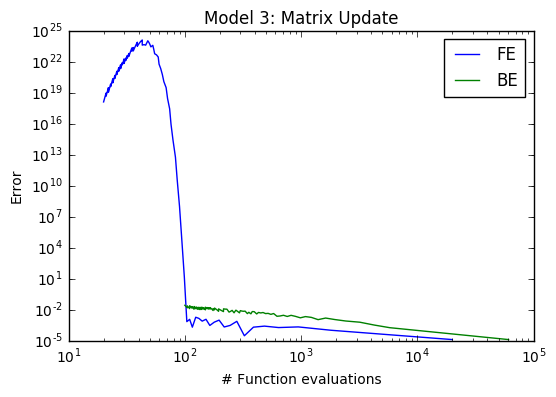

In [11]:
errorsfe3 = []
errorsbe3 = []
sol = np.array([np.exp(-2),np.exp(-200)])
for i in range(yfe2.shape[0]):
    errorsfe3.append(norm(yfe3[:,i] - sol))
    errorsbe3.append(norm(ybe3[:,i] - sol))                                                
plt.loglog(nfe3,errorsfe3)
plt.loglog(nbe3,errorsbe3)
plt.legend(['FE','BE'],loc = 'upper right')
plt.xlabel('# Function evaluations')
plt.ylabel('Error')
plt.title('Model 3: Matrix Update')
plt.show()

#### Model 3: Matrix update


Once again, FE does horribly bad for large step sizes. 

Once the step size is small enough, FE seems to be more efficient than BE. It does take orders of magnitude more function evaluations for BE to match the accuracy of FE once step size is small enough. However, given the rather small level of increased accuracy FE is probably a riskier choice of method to use. It is more efficient when it will converge, but it is much less reliable. 

## c) 

Now let's see the convergence as a function of time. I'll chose a smallish step size and a largish step size in order to compare the two methods. 

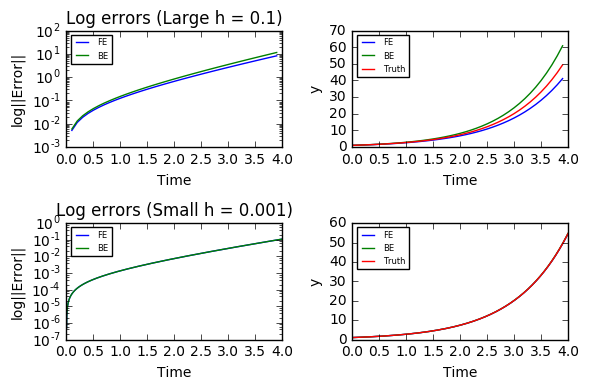

In [12]:
# ======================================== MODEL 1 : Lambda = 1 ===================================================
h = 0.1  # Fairly large
f = model1
Jf = model1J
t0 = 0
te = 4
y0 = np.array([1,1])

t,yfe1,evals = odefe(f,h,t0,te,y0)
t,ybe1,evals = odebe(f,Jf,h,t0,te,y0)
true = np.exp(t)

plt.subplot(2,2,1)
plt.semilogy(t,abs(np.array(yfe1)[:,0] - true)) # it's 1d: abs == norm
plt.semilogy(t,abs(np.array(ybe1)[:,0] - true))
plt.legend(['FE','BE'],loc = 'upper left',prop={'size': 6})
plt.title('Log errors (Large h = 0.1)')
plt.xlabel('Time')
plt.ylabel('log||Error||')

plt.subplot(2,2,2)
plt.plot(t,np.array(yfe1)[:,0]) # it's 1d: abs == norm
plt.plot(t,np.array(ybe1)[:,0])
plt.plot(t,true)
plt.legend(['FE','BE','Truth'],loc = 'upper left',prop={'size': 6})
plt.xlabel('Time')
plt.ylabel('y')
plt.tight_layout()


 
# ============================== Small H ==============================    
    
    
h = 0.001  # Fairly small
y0 = np.array([1,1])

t,yfe1,evals = odefe(f,h,t0,te,y0)
t,ybe1,evals = odebe(f,Jf,h,t0,te,y0)

true = np.exp(t)

plt.subplot(2,2,3)
plt.semilogy(t,abs(np.array(yfe1)[:,0] - true)) # it's 1d: abs == norm
plt.semilogy(t,abs(np.array(ybe1)[:,0] - true))
plt.legend(['FE','BE'],loc = 'upper left',prop={'size': 6})
plt.title('Log errors (Small h = 0.001)')
plt.xlabel('Time')
plt.ylabel('log||Error||')

plt.subplot(2,2,4)
plt.plot(t,np.array(yfe1)[:,0]) # it's 1d: abs == norm
plt.plot(t,np.array(ybe1)[:,0])
plt.plot(t,true)
plt.legend(['FE','BE','Truth'],loc = 'upper left',prop={'size': 6})
plt.xlabel('Time')
plt.ylabel('y')
plt.tight_layout()
plt.show()

Aside from being a little small, the figures show that error increased over time with both FE and BE. A small step size appears to give fairly accurate results for both methods. Further, it's clear that a small step size makes both methods perform more similarly.

Let's see how the methods do with $\lambda = -23$

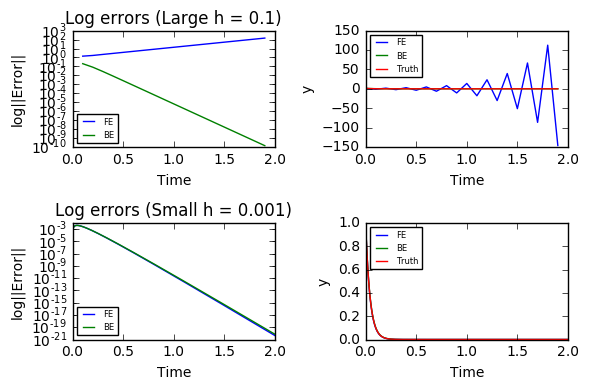

In [13]:
# ======================================== MODEL 2 : Lambda = -23 ===================================================
h = 0.1  # Fairly large
f = model2
Jf = model2J
t0 = 0
te = 2
y0 = np.array([1,1])

t,yfe2,evals = odefe(f,h,t0,te,y0)
t,ybe2,evals = odebe(f,Jf,h,t0,te,y0)
true = np.exp(-23*np.array(t))

plt.subplot(2,2,1)
plt.semilogy(t,abs(np.array(yfe2)[:,0] - true)) # it's 1d: abs == norm
plt.semilogy(t,abs(np.array(ybe2)[:,0] - true))
plt.legend(['FE','BE'],loc = 'lower left',prop={'size': 6})
plt.title('Log errors (Large h = 0.1)')
plt.xlabel('Time')
plt.ylabel('log||Error||')

plt.subplot(2,2,2)
plt.plot(t,np.array(yfe2)[:,0]) # it's 1d: abs == norm
plt.plot(t,np.array(ybe2)[:,0])
plt.plot(t,true)
plt.legend(['FE','BE','Truth'],loc = 'upper left',prop={'size': 6})
plt.xlabel('Time')
plt.ylabel('y')
plt.tight_layout()


 
# ============================== Small H ==============================    
    
    
h = 0.001  # Fairly small
y0 = np.array([1,1])

t,yfe2,evals = odefe(f,h,t0,te,y0)
t,ybe2,evals = odebe(f,Jf,h,t0,te,y0)
true = np.exp(-23*np.array(t))


plt.subplot(2,2,3)
plt.semilogy(t,abs(np.array(yfe2)[:,0] - true)) # it's 1d: abs == norm
plt.semilogy(t,abs(np.array(ybe2)[:,0] - true))
plt.legend(['FE','BE'],loc = 'lower left',prop={'size': 6})
plt.title('Log errors (Small h = 0.001)')
plt.xlabel('Time')
plt.ylabel('log||Error||')

plt.subplot(2,2,4)
plt.plot(t,np.array(yfe2)[:,0]) # it's 1d: abs == norm
plt.plot(t,np.array(ybe2)[:,0])
plt.plot(t,true)
plt.legend(['FE','BE','Truth'],loc = 'upper left',prop={'size': 6})
plt.xlabel('Time')
plt.ylabel('y')
plt.tight_layout()
plt.show()

Here we can clearly see that, although FE does ok at first, with a large step size the method quickly becomes unstable. One can see the ossilations start off small and then compound as time increases. In contrast, BE remains stable and is able to solve the system well.

We can see that FE with a small step size also solve the system well and the instability associated with a larger step size is avoided.

The difference between $\lambda = 1$ and $\lambda = -23$ is the speed at which the system changes. The $\lambda = 1$ model changes much slower than the $\lambda = -23$ model. We expect to see the same thing happen for Model 3, with FE solving one variable of the system well and the other horribly.

We examine this now.

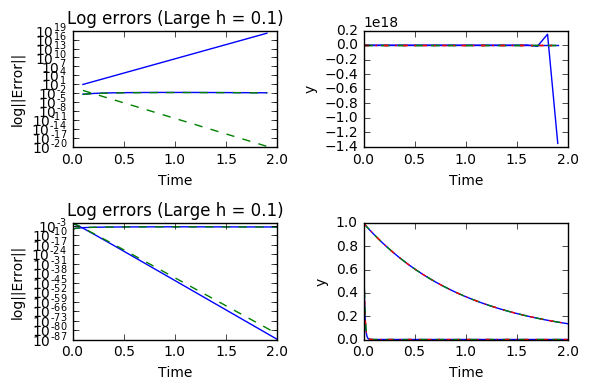

In [14]:
# ======================================== MODEL 2 : Lambda = -23 ===================================================
h = 0.1  # Fairly large
f = model3
Jf = model3J
t0 = 0
te = 2
y0 = np.array([1,1])

t,yfe3,evals = odefe(f,h,t0,te,y0)
t,ybe3,evals = odebe(f,Jf,h,t0,te,y0)
true = np.stack((np.exp(-1*np.array(t)),np.exp(-100*np.array(t)))).T

plt.subplot(2,2,1)
plt.semilogy(t,abs(np.array(yfe3) - true),color = 'blue') # it's 1d: abs == norm
plt.semilogy(t,abs(np.array(ybe3) - true),'--',color = 'green')
plt.title('Log errors (Large h = 0.1)')
plt.xlabel('Time')
plt.ylabel('log||Error||')

plt.subplot(2,2,2)
plt.plot(t,np.array(yfe3),color = 'blue') # it's 1d: abs == norm
plt.plot(t,np.array(ybe3),'--',color = 'green')
plt.plot(t,true , '-.', color = 'red')
plt.xlabel('Time')
plt.ylabel('y')
plt.tight_layout()


 
# ============================== Small H ==============================    
    
    
h = 0.001  # Fairly small
y0 = np.array([1,1])

t,yfe3,evals = odefe(f,h,t0,te,y0)
t,ybe3,evals = odebe(f,Jf,h,t0,te,y0)
true = np.stack((np.exp(-1*np.array(t)),np.exp(-100*np.array(t)))).T

plt.subplot(2,2,3)
plt.semilogy(t,abs(np.array(yfe3) - true),color = 'blue')
plt.semilogy(t,abs(np.array(ybe3) - true),'--',color = 'green')
plt.title('Log errors (Large h = 0.1)')
plt.xlabel('Time')
plt.ylabel('log||Error||')

plt.subplot(2,2,4)
plt.plot(t,np.array(yfe3),color = 'blue') # it's 1d: abs == norm
plt.plot(t,np.array(ybe3),'--',color = 'green')
plt.plot(t,true , '-.', color = 'red')
plt.xlabel('Time')
plt.ylabel('y')
plt.tight_layout()
plt.show()

FE: Blue
BE: Green
Truth: Red

Clearly we are seeing a wide range of errors here. For large step size, FE 'achieves' errors of 10e19. It achieves these errors solving the $y_2$ variable of the system. The one associated with $-100$. However, it can be seen that while performing so bad on $y_2$, it solves $y_1$ (associated with $-1$) fairly well. About on the order of 10e-2.


With a small step size, as predicted by our earlier experiements, FE is able to do well solving the system. BE performs well in all cases. It is a much more stable method. 

# Q3)

Now we can experiment with the good methods. They are actually used in practice, with variants of RK4 being the defulat ODE solver for most applications. 

In [62]:
def oder2(f,h,t0,te,y0):
    '''
    f: function dependant on (tn,yn) assumed to be **vectorized**
    h: step size
    t0: start time
    te: end time
    y0: IC
        
    Returns: a dxn matrix where d is the function dimension and n is num. time steps
             a vector of times
    '''    
    n = int(np.floor((te - t0)/h)) # We expect the floor to be irrelevant in our experiments
    d = y0.size
    ysave = np.zeros((d,n))
    
    t = t0
    y = y0.copy()
    
    ysave = []
    tsave = []
    fevals = []    
    while t < te:
        evals_iter = 0
        tsave.append(t)
        ysave.append(y)
        
        # Update y
        a = y + h * f(t,y.copy())/2
        y = y + h*f(t + h/2,a)
        
                        
        evals_iter += 2
        t += h
        fevals.append(evals_iter)
    return tsave,ysave,fevals

def oderk4(f,h,t0,te,y0):
    '''
    f: function dependant on (tn,yn) assumed to be **vectorized**
    h: step size
    t0: start time
    te: end time
    y0: IC
        
    Returns: a dxn matrix where d is the function dimension and n is num. time steps
             a vector of times
    '''    
    
    n = int(np.floor((te - t0)/h)) # We expect the floor to be irrelevant in our experiments
    d = y0.size
    ysave = np.zeros((d,n))
    
    t = t0
    y = y0.copy()
    
    ysave = []
    tsave = []
    fevals = []    
    while t < te:
        evals_iter = 0
        tsave.append(t)
        ysave.append(y)
        
        # Update y
        k1 = f(t,y)
        k2 = f(t + h/2,y + h*k1/2)
        k3 = f(t + h/2,y + h*k2/2)
        k4 = f(t+h,y + h*k3)
        
        y = y + h*(k1 + 2*k2 + 2*k3 + k4)/6

        
        evals_iter += 4
        t += h
        fevals.append(evals_iter)
    return tsave,ysave,fevals

Ok, now we can test them.

## a) 

In [16]:
hs = np.linspace(0.0001,0.1,100)

# Model 1 data init
yfe1 = np.zeros(len(hs))
ybe1 = np.zeros(len(hs))
yr21 = np.zeros(len(hs))
yrk41 = np.zeros(len(hs))

nfe1 = np.zeros(len(hs))
nbe1 = np.zeros(len(hs))
nr21 = np.zeros(len(hs))
nrk41 = np.zeros(len(hs))


# Model 2 data init
yfe2 = np.zeros(len(hs))
ybe2 = np.zeros(len(hs))
yr22 = np.zeros(len(hs))
yrk42 = np.zeros(len(hs))

nfe2 = np.zeros(len(hs))
nbe2 = np.zeros(len(hs))
nr22 = np.zeros(len(hs))
nrk42 = np.zeros(len(hs))


# Model 3 data init
yfe3 = np.zeros([2,len(hs)])
ybe3 = np.ones([2,len(hs)])
yr23 = np.zeros([2,len(hs)])
yrk43 = np.ones([2,len(hs)])

nfe3 = np.zeros(len(hs))
nbe3 = np.zeros(len(hs))
nr23 = np.zeros(len(hs))
nrk43 = np.zeros(len(hs))


for i,h in enumerate(hs):
    f = model1
    Jf = model1J
    t0 = 0
    te = 2
    y0 = np.array([1,1])
    
    t,y,evals = odefe(f,h,t0,te,y0)
    yfe1[i] = y[-1][-1]
    nfe1[i] = sum(evals)        
    
    t,y,evals = odebe(f,Jf,h,t0,te,y0)
    ybe1[i] = y[-1][-1]
    nbe1[i] = sum(evals)
    
    t,y,evals = oder2(f,h,t0,te,y0)
    yr21[i] = y[-1][-1]
    nr21[i] = sum(evals)
    
    t,y,evals = oderk4(f,h,t0,te,y0)
    yrk41[i] = y[-1][-1]
    nrk41[i] = sum(evals)
    
for i,h in enumerate(hs):
    f = model2
    Jf = model2J
    t0 = 0
    te = 2
    y0 = np.array([1,1])
    
    t,y,evals = odefe(f,h,t0,te,y0)
    yfe2[i] = y[-1][-1]
    nfe2[i] = sum(evals)    
    
    t,y,evals = odebe(f,Jf,h,t0,te,y0)
    ybe2[i] = y[-1][-1]
    nbe2[i] = sum(evals) 
    
    t,y,evals = oder2(f,h,t0,te,y0)
    yr22[i] = y[-1][-1]
    nr22[i] = sum(evals)
    
    t,y,evals = oderk4(f,h,t0,te,y0)
    yrk42[i] = y[-1][-1]
    nrk42[i] = sum(evals)
    
for i,h in enumerate(hs):
    f = model3
    Jf = model3J
    t0 = 0
    te = 2
    y0 = np.array([1,1])
    
    t,y,evals = odefe(f,h,t0,te,y0)
    yfe3[:,i] = y[-1]
    nfe3[i] = sum(evals)    
    
    t,y,evals = odebe(f,Jf,h,t0,te,y0)
    ybe3[:,i] = y[-1]     
    nbe3[i] = sum(evals) 
    
    t,y,evals = oder2(f,h,t0,te,y0)
    yr23[:,i] = y[-1]
    nr23[i] = sum(evals)
    
    t,y,evals = oderk4(f,h,t0,te,y0)
    yrk43[:,i] = y[-1]
    nrk43[i] = sum(evals)
    
    

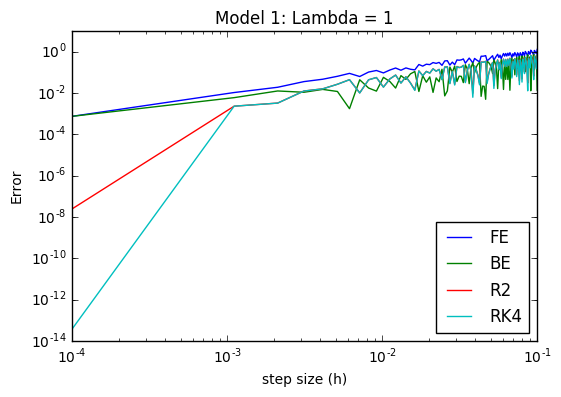

In [17]:
errorsfe1 = [norm(y - np.exp(2)) for y in yfe1]
errorsbe1 = [norm(y - np.exp(2)) for y in ybe1]
errorsr21 = [norm(y - np.exp(2)) for y in yr21]
errorsrk41 = [norm(y - np.exp(2)) for y in yrk41]
plt.loglog(hs,errorsfe1)
plt.loglog(hs,errorsbe1)
plt.loglog(hs,errorsr21)
plt.loglog(hs,errorsrk41)
plt.legend(['FE','BE','R2','RK4'],loc = 'lower right')
plt.xlabel('step size (h)')
plt.ylabel('Error')
plt.title('Model 1: Lambda = 1')
plt.show()

##### Model 1: Lambda =1 

Interestingly, it seems that the methods perform roughly the same for larger step sizes. However, once the step size is small enough, Rk4 and Runge 2nd order methods quickly outpace the Euler methods. 

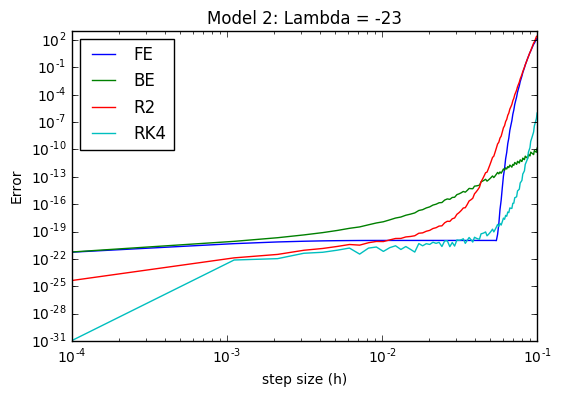

In [18]:
errorsfe2 = [norm(y - np.exp(1)**(-23*2)) for y in yfe2]
errorsbe2 = [norm(y - np.exp(1)**(-23*2)) for y in ybe2]
errorsr22 = [norm(y - np.exp(1)**(-23*2)) for y in yr22]
errorsrk42 = [norm(y - np.exp(1)**(-23*2)) for y in yrk42]
plt.loglog(hs,errorsfe2)
plt.loglog(hs,errorsbe2)
plt.loglog(hs,errorsr22)
plt.loglog(hs,errorsrk42)
plt.legend(['FE','BE','R2','RK4'],loc = 'upper left')
plt.xlabel('step size (h)')
plt.ylabel('Error')
plt.title('Model 2: Lambda = -23')
plt.show()


##### Model 2: Lambda = -23

Here we see that for large step sizes, the explicit methods are relatively poor. Particularly, R2 and FE. For medium step sizes, the methods again seem to do roughly the same. But for appropriately small steps the RK4 method is much better. 

R2 is fairly good and although the Euler methods converge, they do so slower.

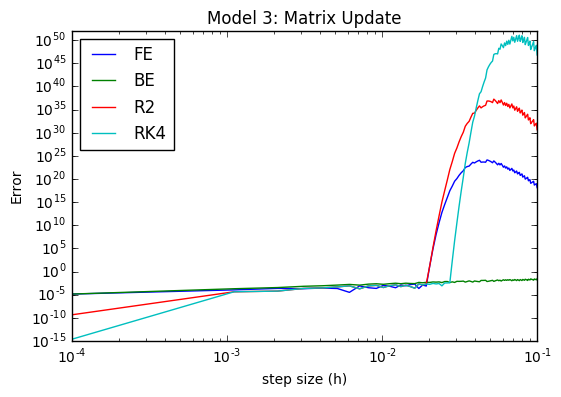

In [19]:
errorsfe3 = []
errorsbe3 = []
errorsr23 = []
errorsrk43 = []
sol = np.array([np.exp(-2),np.exp(-200)])
for i in range(yfe2.shape[0]):
    errorsfe3.append(norm(yfe3[:,i] - sol))
    errorsbe3.append(norm(ybe3[:,i] - sol))
    errorsr23.append(norm(yr23[:,i] - sol))
    errorsrk43.append(norm(yrk43[:,i] - sol))
plt.loglog(hs,errorsfe3)
plt.loglog(hs,errorsbe3)
plt.loglog(hs,errorsr23)
plt.loglog(hs,errorsrk43)
plt.legend(['FE','BE','R2','RK4'],loc = 'upper left')
plt.xlabel('step size (h)')
plt.ylabel('Error')
plt.title('Model 3: Matrix Update')
plt.show()

#### Model 3: Matrix Update

The only implicit method, BE, outshines all the rest of the methods for large step sizes. It's interesting to see that RK4 does the worst out of all the methods for these large steps. 

For medium step sizes, the methods are essential identical in error which is really interesting. Once again, with small steps, RK4 outpaces the rest.

Now let's look at the error as a function of function evaluations. Let's remember that for these plots, the superior model lies in the lower left quadrants of worse functions.

## b)

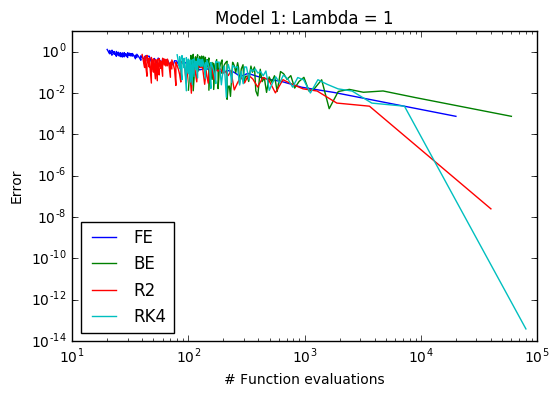

In [20]:
plt.loglog(nfe1,errorsfe1)
plt.loglog(nbe1,errorsbe1)
plt.loglog(nr21,errorsr21)
plt.loglog(nrk41,errorsrk41)
plt.legend(['FE','BE','R2','RK4'],loc = 'lower left')
plt.xlabel('# Function evaluations')
plt.ylabel('Error')
plt.title('Model 1: Lambda = 1')
plt.show()

#### Model 1: Lambda = 1

Despite taking 4 function evaluations per iteration, the RK4 method still outperforms all the rest. It seems that the extra accuracy gained by the extra evaluations was put to good use. Both Runge-X methods outperformed the Euler methods. 

This difference becomes clearer as the step sizes decreases. If we consider the error terms form $O(h^a)$ it's not surprising that a small step size benefits the more accurate methods disproportionately. 


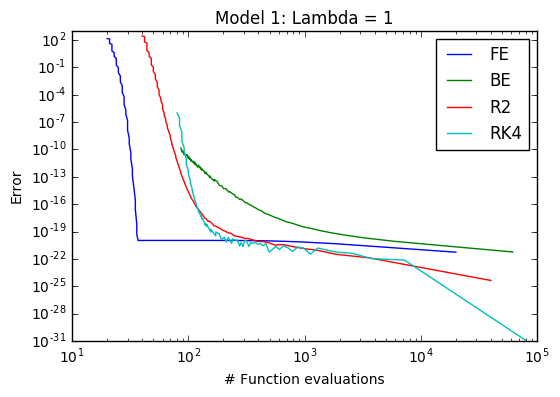

In [21]:
plt.loglog(nfe2,errorsfe2)
plt.loglog(nbe2,errorsbe2)
plt.loglog(nr22,errorsr22)
plt.loglog(nrk42,errorsrk42)
plt.legend(['FE','BE','R2','RK4'],loc = 'upper right')
plt.xlabel('# Function evaluations')
plt.ylabel('Error')
plt.title('Model 1: Lambda = 1')
plt.show()

#### Model 2: Lambda = -23

For this method BE is the most consitantly accuracte method. It has the lowest highest error. 

However, the implicit methods quickly begin to outperform the BE method when step size is reduced far enough. It's interesting that the FE method seems to outperform Runge's 2nd order method until step size is reduced enough. 

This might give insight into why RK4 is a default implementation for many applications. It is far more efficient that many alternatives. 

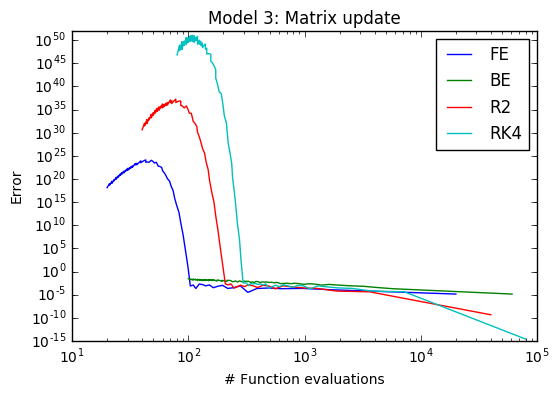

In [22]:
plt.loglog(nfe3,errorsfe3)
plt.loglog(nbe3,errorsbe3)
plt.loglog(nr23,errorsr23)
plt.loglog(nrk43,errorsrk43)
plt.legend(['FE','BE','R2','RK4'],loc = 'upper right')
plt.xlabel('# Function evaluations')
plt.ylabel('Error')
plt.title('Model 3: Matrix update')
plt.show()

#### Model 3: Matrix Update

Again we see that for this model the most efficient solvers, when used with a small step size, are the least efficient models when used with a large step size. All the explicit methods perform *very* badly with a large step size. 

Interestingly, medium step sizes seem not to benefit any solver too much. While, as expected, the RK4 method quickly outpaces the rest with a small enough step size. Again, the error that we see here is coming from the $y_2$ variable of this model. The variable associated with $-100$. The explicit methods cannot handle the rapid change of the system. While the implicit BE method can.


Now let's see how the error changes over time.

## c)

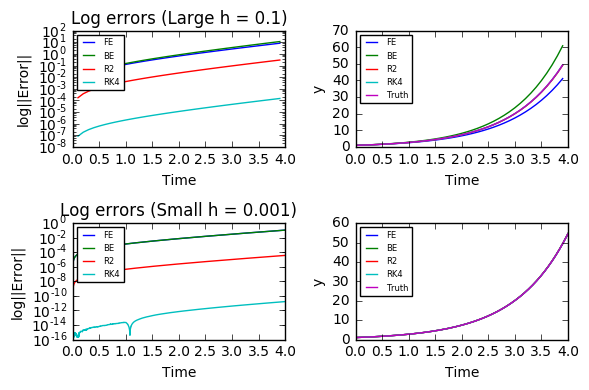

In [23]:
# ======================================== MODEL 1 : Lambda = 1 ===================================================
h = 0.1  # Fairly large
f = model1
Jf = model1J
t0 = 0
te = 4
y0 = np.array([1,1])

t,yfe1,evals = odefe(f,h,t0,te,y0)
t,ybe1,evals = odebe(f,Jf,h,t0,te,y0)
t,yr21,evals = oder2(f,h,t0,te,y0)
t,yrk41,evals = oderk4(f,h,t0,te,y0)
true = np.exp(t)

plt.subplot(2,2,1)
plt.semilogy(t,abs(np.array(yfe1)[:,0] - true)) # it's 1d: abs == norm
plt.semilogy(t,abs(np.array(ybe1)[:,0] - true))
plt.semilogy(t,abs(np.array(yr21)[:,0] - true))
plt.semilogy(t,abs(np.array(yrk41)[:,0] - true))
plt.legend(['FE','BE','R2','RK4','Truth'],loc = 'upper left',prop={'size': 6})
plt.title('Log errors (Large h = 0.1)')
plt.xlabel('Time')
plt.ylabel('log||Error||')

plt.subplot(2,2,2)
plt.plot(t,np.array(yfe1)[:,0]) # it's 1d: abs == norm
plt.plot(t,np.array(ybe1)[:,0])
plt.plot(t,np.array(yr21)[:,0])
plt.plot(t,np.array(yrk41)[:,0])
plt.plot(t,true)
plt.legend(['FE','BE','R2','RK4','Truth'],loc = 'upper left',prop={'size': 6})
plt.xlabel('Time')
plt.ylabel('y')
plt.tight_layout()


 
# ============================== Small H ==============================    
    
    
h = 0.001  # Fairly small
y0 = np.array([1,1])

t,yfe1,evals = odefe(f,h,t0,te,y0)
t,ybe1,evals = odebe(f,Jf,h,t0,te,y0)
t,yr21,evals = oder2(f,h,t0,te,y0)
t,yrk41,evals = oderk4(f,h,t0,te,y0)
true = np.exp(t)

plt.subplot(2,2,3)
plt.semilogy(t,abs(np.array(yfe1)[:,0] - true)) # it's 1d: abs == norm
plt.semilogy(t,abs(np.array(ybe1)[:,0] - true))
plt.semilogy(t,abs(np.array(yr21)[:,0] - true))
plt.semilogy(t,abs(np.array(yrk41)[:,0] - true))
plt.legend(['FE','BE','R2','RK4','Truth'],loc = 'upper left',prop={'size': 6})
plt.title('Log errors (Small h = 0.001)')
plt.xlabel('Time')
plt.ylabel('log||Error||')

plt.subplot(2,2,4)
plt.plot(t,np.array(yfe1)[:,0]) # it's 1d: abs == norm
plt.plot(t,np.array(ybe1)[:,0])
plt.plot(t,np.array(yr21)[:,0])
plt.plot(t,np.array(yrk41)[:,0])
plt.plot(t,true)
plt.legend(['FE','BE','R2','RK4','Truth'],loc = 'upper left',prop={'size': 6})
plt.xlabel('Time')
plt.ylabel('y')
plt.tight_layout()
plt.show()

#### Model 1: Lambda = 1

All methods more or less worked well. Obviously, the Runge-X methods worked better than the Euler methods. Not too surprising, this is a very easy system to solve.

The RK4 method outperformed all others for both large and small step size. 

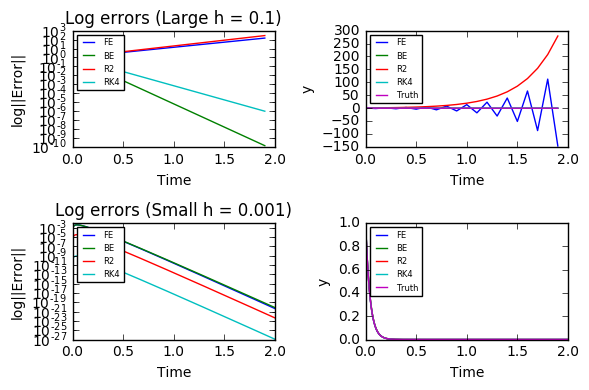

In [24]:
# ======================================== MODEL 2 : Lambda = -23 ===================================================
h = 0.1  # Fairly large
f = model2
Jf = model2J
t0 = 0
te = 2
y0 = np.array([1,1])

t,yfe2,evals = odefe(f,h,t0,te,y0)
t,ybe2,evals = odebe(f,Jf,h,t0,te,y0)
t,yr22,evals = oder2(f,h,t0,te,y0)
t,yrk42,evals = oderk4(f,h,t0,te,y0)
true = np.exp(-23*np.array(t))

plt.subplot(2,2,1)
plt.semilogy(t,abs(np.array(yfe2)[:,0] - true)) # it's 1d: abs == norm
plt.semilogy(t,abs(np.array(ybe2)[:,0] - true))
plt.semilogy(t,abs(np.array(yr22)[:,0] - true))
plt.semilogy(t,abs(np.array(yrk42)[:,0] - true))
plt.legend(['FE','BE','R2','RK4','Truth'],loc = 'upper left',prop={'size': 6})
plt.title('Log errors (Large h = 0.1)')
plt.xlabel('Time')
plt.ylabel('log||Error||')

plt.subplot(2,2,2)
plt.plot(t,np.array(yfe2)[:,0]) # it's 1d: abs == norm
plt.plot(t,np.array(ybe2)[:,0])
plt.plot(t,np.array(yr22)[:,0])
plt.plot(t,np.array(yrk42)[:,0])
plt.plot(t,true)
plt.legend(['FE','BE','R2','RK4','Truth'],loc = 'upper left',prop={'size': 6})
plt.xlabel('Time')
plt.ylabel('y')
plt.tight_layout()


 
# ============================== Small H ==============================    
    
    
h = 0.001  # Fairly small
y0 = np.array([1,1])

t,yfe2,evals = odefe(f,h,t0,te,y0)
t,ybe2,evals = odebe(f,Jf,h,t0,te,y0)
t,yr22,evals = oder2(f,h,t0,te,y0)
t,yrk42,evals = oderk4(f,h,t0,te,y0)
true = np.exp(-23*np.array(t))

plt.subplot(2,2,3)
plt.semilogy(t,abs(np.array(yfe2)[:,0] - true)) # it's 1d: abs == norm
plt.semilogy(t,abs(np.array(ybe2)[:,0] - true))
plt.semilogy(t,abs(np.array(yr22)[:,0] - true))
plt.semilogy(t,abs(np.array(yrk42)[:,0] - true))
plt.legend(['FE','BE','R2','RK4','Truth'],loc = 'upper left',prop={'size': 6})
plt.title('Log errors (Small h = 0.001)')
plt.xlabel('Time')
plt.ylabel('log||Error||')

plt.subplot(2,2,4)
plt.plot(t,np.array(yfe2)[:,0]) # it's 1d: abs == norm
plt.plot(t,np.array(ybe2)[:,0])
plt.plot(t,np.array(yr22)[:,0])
plt.plot(t,np.array(yrk42)[:,0])
plt.plot(t,true)
plt.legend(['FE','BE','R2','RK4','Truth'],loc = 'upper left',prop={'size': 6})
plt.xlabel('Time')
plt.ylabel('y')
plt.tight_layout()
plt.show()

#### Model 2: Model 2: Lambda = -23

It seems a $\lambda$ value of -23 is large enough (in abs val sense) to cause the R2 method to become unstable with large step size while RK4 is still capable of converging well. However, we see that with this relatively unruly system the implicit BE solver outperforms the rest.

It's interesting to see how the R2 method divergers in a smooth manner, while the FE method oscillates wildly. I imagine the addition function evaluations help R2 to at least remain in the same half plane. 


With small step sizes, everything is back to normal and RK4 and R2 outperforms the Euler methods. RK4 outperforms them all.

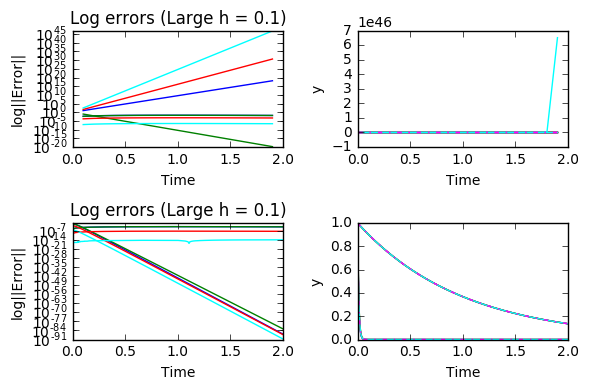

In [25]:
# ======================================== MODEL 3 : Matrix update ===================================================
h = 0.1  # Fairly large
f = model3
Jf = model3J
t0 = 0
te = 2
y0 = np.array([1,1])

t,yfe3,evals = odefe(f,h,t0,te,y0)
t,ybe3,evals = odebe(f,Jf,h,t0,te,y0)
t,yr23,evals = oder2(f,h,t0,te,y0)
t,yrk43,evals = oderk4(f,h,t0,te,y0)
true = np.stack((np.exp(-1*np.array(t)),np.exp(-100*np.array(t)))).T

plt.subplot(2,2,1)
plt.semilogy(t,abs(np.array(yfe3) - true),color = 'blue')
plt.semilogy(t,abs(np.array(ybe3) - true),color = 'green')
plt.semilogy(t,abs(np.array(yr23) - true),color = 'red') 
plt.semilogy(t,abs(np.array(yrk43) - true),color = 'cyan') 
plt.title('Log errors (Large h = 0.1)')
plt.xlabel('Time')
plt.ylabel('log||Error||')

plt.subplot(2,2,2)
plt.plot(t,np.array(yfe3),color = 'blue') # it's 1d: abs == norm
plt.plot(t,np.array(ybe3),color = 'green')
plt.plot(t,np.array(yr23),color = 'red') # it's 1d: abs == norm
plt.plot(t,np.array(yrk43),color = 'cyan')
plt.plot(t,true , '-.', color = 'magenta')
plt.xlabel('Time')
plt.ylabel('y')
plt.tight_layout()


 
# ============================== Small H ==============================    
    
    
h = 0.001  # Fairly small
y0 = np.array([1,1])

t,yfe3,evals = odefe(f,h,t0,te,y0)
t,ybe3,evals = odebe(f,Jf,h,t0,te,y0)
t,yr23,evals = oder2(f,h,t0,te,y0)
t,yrk43,evals = oderk4(f,h,t0,te,y0)
true = np.stack((np.exp(-1*np.array(t)),np.exp(-100*np.array(t)))).T

plt.subplot(2,2,3)
plt.semilogy(t,abs(np.array(yfe3) - true),color = 'blue')
plt.semilogy(t,abs(np.array(ybe3) - true),color = 'green')
plt.semilogy(t,abs(np.array(yr23) - true),color = 'red') 
plt.semilogy(t,abs(np.array(yrk43) - true),color = 'cyan')
plt.title('Log errors (Large h = 0.1)')
plt.xlabel('Time')
plt.ylabel('log||Error||')

plt.subplot(2,2,4)
plt.plot(t,np.array(yfe3),color = 'blue') # it's 1d: abs == norm
plt.plot(t,np.array(ybe3),color = 'green')
plt.plot(t,np.array(yr23),color = 'red')
plt.plot(t,np.array(yrk43),color = 'cyan')
plt.plot(t,true , '-.', color = 'magenta')
plt.xlabel('Time')
plt.ylabel('y')
plt.tight_layout()
plt.show()

#### Model 3: Matrix update. 
Here Matplotlib really liked to show many ticks. 

If we look at the top left plot, we can see how the solver succesfully solve the first $y_1$ compenent of the system. This is reflected in the straightish lines around 10e-3. The part associated with $-1$. However, we also see how they failed badly at the $y_2$ component. The RK4 method failed the worst of all. I suppose it pays a price for it fast convergence with small step sizes. In the top left plot, all the implicit methods actually diverge. It is just the RK4 does so much faster than the rest and plot makes it difficult to see. 

With a small step size we see RK4 outperforming the other methods with quick convergence. We also see a very good level of accuracy (from all solvers) at 10e-91 for the $y_1$ component by the end of the integration. 

A dip can be seen where RK4 is most accurate in the bottom left plot. I don't know what that is and it is not a large change. Perhaps it is a numerical artifact, but maybe it is something more interesting. I can't even say I have much of an educated guess as to what causes it.

# Q4)

Studying the 6 body problem. 



In [13]:
# Data for outer solar system simulation
# Units: mass in solar mass, time in Earth day, length in astronomical unit
# Source: J.A.Barth. Ahnerts Kalender fur Sternfreunde 1994. Verlag
    
g=2.95912208286e-4;         # the gravitational constant

m=[0]*6                 # masses
m[0]=1.00000597682         # Sun + inner planets
m[1]=9.54786104043e-4      # Jupiter
m[2]=2.85583733151e-4      # Saturn
m[3]=4.37273164546e-5      # Uranus
m[4]=5.17759138449e-5      # Neptune
m[5]=7.692307692307693e-9  # Pluto

x=[0]*36;               

# Initial positions at 1994-09-05, UTC0:00
x[0]=0                    # Sun
x[1]=0
x[2]=0

x[3]=-3.5023653          # Jupiter
x[4]=-3.8169847
x[5]=-1.5507963

x[6]= 9.0755314          # Saturn
x[7]=-3.0458353
x[8]=-1.6483708

x[9]=  8.3101420          # Uranus
x[10]=-16.2901086
x[11]= -7.2521278

x[12]= 11.4707666          # Neptune
x[13]=-25.7294829
x[14]=-10.8169456

x[15]=-15.5387357          # Pluto
x[16]=-25.2225594
x[17]= -3.1902382

# Initial velocities at 1994-09-05, UTC0:00
x[18]=0                    # Sun
x[19]=0
x[20]=0

x[21]= 0.00565429          # Jupiter
x[22]=-0.00412490
x[23]=-0.00190589

x[24]= 0.00168318          # Saturn
x[25]= 0.00483525
x[26]= 0.00192462

x[27]= 0.00354178          # Uranus
x[28]= 0.00137102
x[29]= 0.00055029

x[30]= 0.00288930          # Neptune
x[31]= 0.00114527
x[32]= 0.00039677

x[33]= 0.00276725          # Pluto
x[34]=-0.00170702
x[35]=-0.00136504

x = np.array(x)

The acceleration felt by a body $i$ at position $z$ is given by

$$z_i'' = -G \sum_{j=1,j\neq i}^n m_j \frac{z_i - z_j}{||z_i - z_j||^3}$$

as we can see this is a second order ODE. We can make it first order by introducing

$$v_i = z_i'$$

then we have the system

$$\begin{align} v_i & = z_i' \\ v_i' & = -G \sum_{j=1,j\neq i}^n m_j \frac{z_i - z_j}{||z_i - z_j||^3} \end{align}$$

with the initial conditions of $v_i(0)$ is initial position and $v_i'(0)$ is initial velocity of body $i$

### Coding the n-body problem

Now that we have the formulation we need to code it in

In [76]:
# ================================ Functions to code the ODE =====================================
def vectocomp(x):
    ''' 
    Vector to components: Unpacks x into the seperate position and velocity components
    '''
    # Get positions
    z1 = x[0:3]
    z2 = x[3:6]
    z3 = x[6:9]
    z4 = x[9:12]
    z5 = x[12:15]
    z6 = x[15:18]
    
    # Get velocities
    v1 = x[18:21]
    v2 = x[21:24]
    v3 = x[24:27]
    v4 = x[27:30]
    v5 = x[30:33]
    v6 = x[33:36]
    
    return z1,z2,z3,z4,z5,z6,v1,v2,v3,v4,v5,v6

def comptovec(components):
    ''' 
    Components to Vector: Repacks components into vector
    '''
    x = np.array([0.]*36)

    for i,c  in enumerate(components):        
        x[3*i+0] = c[0]
        x[3*i+1] = c[1]
        x[3*i+2] = c[2]                
        
    return x
                    
def getplanetxyz(data,planet):
    '''
    Input should be:
    
    data: The solution found by the solver
    planet: in {0,1,2,3,4,5} where
        0: Sun
        1: Jupiter
        2: Saturn
        3: Uranus
        4: Neptune
        5: Pluto                    
    '''
    x = [0.]*len(data)
    y = [0.]*len(data)
    z = [0.]*len(data)
    
    for i in range(len(data)):
        x[i] = data[i][3*planet + 0]
        y[i] = data[i][3*planet + 1]
        z[i] = data[i][3*planet + 2]
        
    return x,y,z
    
    

def forcesum(zs,m,i):
    s = 0
    for j,zj in enumerate(zs):
        if not (i == j):
            diff = zs[i] - zs[j]
            s += m[j] * (diff) / norm(diff)**3

    return s


def nbody(t,x):
    z1,z2,z3,z4,z5,z6,v1,v2,v3,v4,v5,v6 = vectocomp(x) # Unpack input vector into seperate components
    
    # Get position update
    dz1 = v1
    dz2 = v2
    dz3 = v3
    dz4 = v4
    dz5 = v5
    dz6 = v6
    
    # Get velocity update
    
    zs = [z1,z2,z3,z4,z5,z6]
    dv1 = -g * forcesum(zs,m,0)
    dv2 = -g * forcesum(zs,m,1)
    dv3 = -g * forcesum(zs,m,2)
    dv4 = -g * forcesum(zs,m,3)
    dv5 = -g * forcesum(zs,m,4)
    dv6 = -g * forcesum(zs,m,5)
    
    return comptovec([dz1,dz2,dz3,dz4,dz5,dz6,dv1,dv2,dv3,dv4,dv5,dv6]) 


def nbodyvelocity(t,zs):

    # Expects a list of particle locations 
    
    # Get velocity update    
    dv1 = -g * forcesum(zs,m,0)
    dv2 = -g * forcesum(zs,m,1)
    dv3 = -g * forcesum(zs,m,2)
    dv4 = -g * forcesum(zs,m,3)
    dv5 = -g * forcesum(zs,m,4)
    dv6 = -g * forcesum(zs,m,5)
    
    return [dv1,dv2,dv3,dv4,dv5,dv6]


def nbodyposition(t,x):
    # update position, leave velocity unchanged
    
    z1,z2,z3,z4,z5,z6,v1,v2,v3,v4,v5,v6 = vectocomp(x) # Unpack input vector into seperate components
    
    # Get position update
    dz1 = v1
    dz2 = v2
    dz3 = v3
    dz4 = v4
    dz5 = v5
    dz6 = v6

    return comptovec([dz1,dz2,dz3,dz4,dz5,dz6,v1,v2,v3,v4,v5,v6])    
    

We also need to add some new solvers for this questions. So we code those below.

In [128]:
def odesymeuler(f,h,t0,te,y0):

    n = int(np.floor((te - t0)/h)) # We expect the floor to be irrelevant in our experiments
    d = y0.size
    ysave = np.zeros((d,n))

    hv = h*np.ones(len(y0))
    hv[0:len(y0)//2] = 0

    hz = h*np.ones(len(y0))
    hz[len(y0)//2:] = 0

    t = t0
    y = y0.copy()

    ysave = []
    tsave = []
    fevals = []
    while t < te:
        evals_iter = 0

        tsave.append(t)
        ysave.append(y)

        # Symplectic Euler step - I code this way so as to not need to change my other functions
        v = y.copy()
        v = v + hv * f(t,v.copy())
        y[len(y0)//2:] = v[len(y0)//2:] # get the updated velocity only
        y = y + hz * f(t,y.copy())
        
        evals_iter += 2
        t += h
        fevals.append(evals_iter)
    return tsave,ysave,fevals


def stormerVertlet(A,h,t0,te,y0):

    z1,z2,z3,z4,z5,z6,v1,v2,v3,v4,v5,v6 = vectocomp(y0) # Unpack input vector into seperate components

    t = t0
    z0 = [z1,z2,z3,z4,z5,z6]
    v0s = [v1,v2,v3,v4,v5,v6]
    a0 = nbodyvelocity(t,z0)

    # Initialize
    znp1 = [z1,z2,z3,z4,z5,z6]
    znm1 = [z1,z2,z3,z4,z5,z6]

    ysave = []
    tsave = []
    for i in range(len(z0)):
        znp1[i] = z0[i] + v0s[i]*h + a0[i]* (h**2)/2



    t += h

    zn = znp1.copy()
    while t < te:
        az = nbodyvelocity(t,zn)
        for i in range(len(zn)):
            znp1[i] = 2*zn[i] - znm1[i] + az[i]*(h**2)

        y = [0]*18
        for i,zi in enumerate(znp1):
            y[3*i + 0] = zi[0]
            y[3*i + 1] = zi[1]
            y[3*i + 2] = zi[2]


        znm1 = zn.copy()
        zn = znp1.copy()

        ysave.append(y)
        tsave.append(t)
        t += h
        
    return tsave,ysave

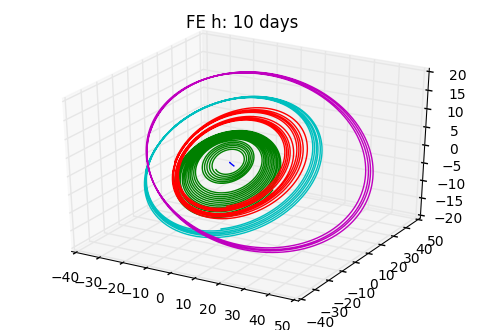

In [139]:
t0 = 0
te = 365 * 1000
h = 10
t,data,evals = odefe(nbody,h,t0,te,x)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sunx,suny,sunz = getplanetxyz(data,0)
ax.plot(sunx,suny,sunz)
jupx,jupy,jupz = getplanetxyz(data,1)
ax.plot(jupx,jupy,jupz)
urx,ury,urz = getplanetxyz(data,3)
ax.plot(urx,ury,urz)
nepx,nepy,nepz = getplanetxyz(data,4)
ax.plot(nepx,nepy,nepz)
plux,pluy,pluz = getplanetxyz(data,5)
ax.plot(plux,pluy,pluz)
plt.title('FE h: 10 days')
plt.show()



#### Forward Euler

FE gives the general idea of what is going on. But clearly it is not performing very well. 

The motion of the planets is not so extreme as to actually have the orbits of Jupiter and Saturn intersect so wildly. It seems that FE expects Jupiter to eventually jump out to a new outer orbit as well. 

Also, the method is slow.

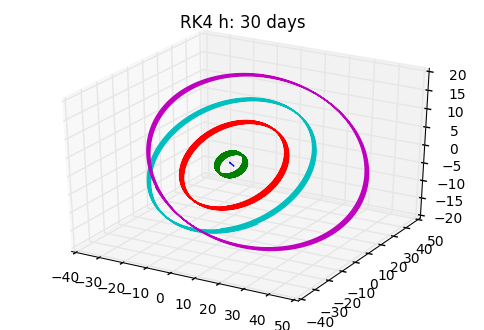

In [140]:
t0 = 0
te = 365 * 1000
h = 30
t,data,evals = oderk4(nbody,h,t0,te,x)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sunx,suny,sunz = getplanetxyz(data,0)
ax.plot(sunx,suny,sunz)
jupx,jupy,jupz = getplanetxyz(data,1)
ax.plot(jupx,jupy,jupz)
urx,ury,urz = getplanetxyz(data,3)
ax.plot(urx,ury,urz)
nepx,nepy,nepz = getplanetxyz(data,4)
ax.plot(nepx,nepy,nepz)
plux,pluy,pluz = getplanetxyz(data,5)
ax.plot(plux,pluy,pluz)
plt.title('RK4 h: 30 days')
plt.show()

#### Runge-Kutta 4

RK4 performs quite well. However, it is also slow. 


It's interesting to see the eliptical shape of the orbits. Also it was very cool to learn that Pluto and Neptune have intersecting orbits. The fact that this was predicted from the acceleration formula and solving for position is very interesting to me. 

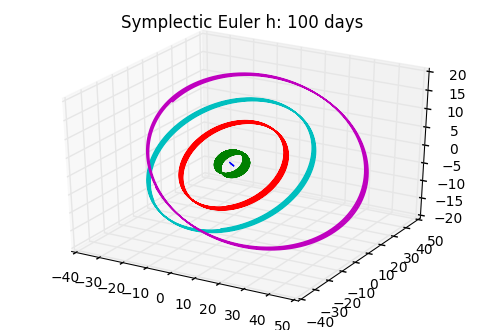

In [141]:
t0 = 0
te = 1000*350
h = 100
t,data,evals = odesymeuler(nbody,h,t0,te,x)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sunx,suny,sunz = getplanetxyz(data,0)
ax.plot(sunx,suny,sunz)
jupx,jupy,jupz = getplanetxyz(data,1)
ax.plot(jupx,jupy,jupz)
urx,ury,urz = getplanetxyz(data,3)
ax.plot(urx,ury,urz)
nepx,nepy,nepz = getplanetxyz(data,4)
ax.plot(nepx,nepy,nepz)
plux,pluy,pluz = getplanetxyz(data,5)
ax.plot(plux,pluy,pluz)
plt.title('Symplectic Euler h: 100 days')
plt.show()

It seems that Symplectic Euler performs (at least visually) just as well as RK4. With a step size more than 3 times as large that is a clear improvement. It seems we got as accurate a picture of the outer solar system with less work. 

Symplectic Euler, conserves energy (nearly). We certainly expect the laws of physics to conserve energy so this is clearly a desirable trait. The other Euler methods do not conserve energy. So we would expect a much more stable picture to be given by this symplectic Euler method.

(I wonder if Euler had anything to do with this method. I imagine he didn't and this method is relatively similiar to FE and BE)

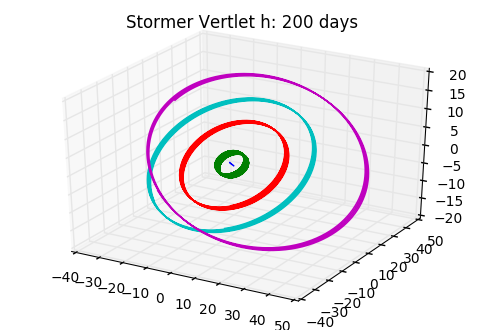

In [142]:
t0 = 0
te = 1000*350
h = 200
t,data = stormerVertlet(nbodyvelocity,h,t0,te,x)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sunx,suny,sunz = getplanetxyz(data,0)
ax.plot(sunx,suny,sunz)
jupx,jupy,jupz = getplanetxyz(data,1)
ax.plot(jupx,jupy,jupz)
urx,ury,urz = getplanetxyz(data,3)
ax.plot(urx,ury,urz)
nepx,nepy,nepz = getplanetxyz(data,4)
ax.plot(nepx,nepy,nepz)
plux,pluy,pluz = getplanetxyz(data,5)
ax.plot(plux,pluy,pluz)
plt.title('Stormer Vertlet h: 200 days')
plt.show()

The Stormer-Verlet method does very well. That's not too surprising as it is custom built for this type of problem.

With a step size of 200 days, this method runs very quickly and very accuractely. It is also easy to implement. Which is a nice bonus. 

#### The methods in general

No one has solved the 6 body problem analytically. This makes it hard to perform error estimates in the manner seen in the first part of this lab. 

What we can comment on is the speed of the method. Further, we can compare more accurate methods to less accurate methods. For example, it doesn't take an astrophysicist to notice that FE does not perform well. 

We can tell that although RK4 looks to be accurate it is much slower than both Symplectic-Euler and Stormer-Vertlet. It takes 4 function evals for every 2 of Sym.Euler and 1 (more like half) of Stormer-Vertlet. 

Symplectic Euler looks to perform well, but Stormer-Vertlet performs best. A large step size can be used, making the method efficient and could be used to project far into the future. 


##### What I learned about planets

I really like this portion of the lab. I though it was very cool to be able to predict the motion of the (outer) solar system so well using only a single observation and 

$$F = ma$$

It was neat to notice that the sun is actually not stationary and despite its size it is pulled by the outer planets. I imagine this effect is more pronouced when Earth, Mercury etc are included. I hadn't known about the intersection of Neptune's and Pluto's orbits. It was cool to pull up a google search and see that the methods we implemented here were correct. 

I noticed the planets follow an eliptical motion and the length of the long end of the elipse changes a fair bit while the short end of the elipse is fairly constant. It is interesting that all the planets here have that effect. 


##### Why I didn't include Backwards Euler

It's been a long lab and I have a busy few weeks :| 